### Imports

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

### Data Preprocessing

In [15]:
data = pd.read_csv('StockData.csv')

data = data.dropna()

data['Target'] = data['Close'].shift(-1)
data = data[:-1]

X = data[['Open', 'High', 'Low', 'Close']]  # Features
y = data['Target']  # Target

### Feature Scaling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Cross-Validation for Linear Regression


Linear Regression - Average MSE across folds: 37.05
Linear Regression - Average MAE across folds: 0.84
Linear Regression - Average R² across folds: 1.00


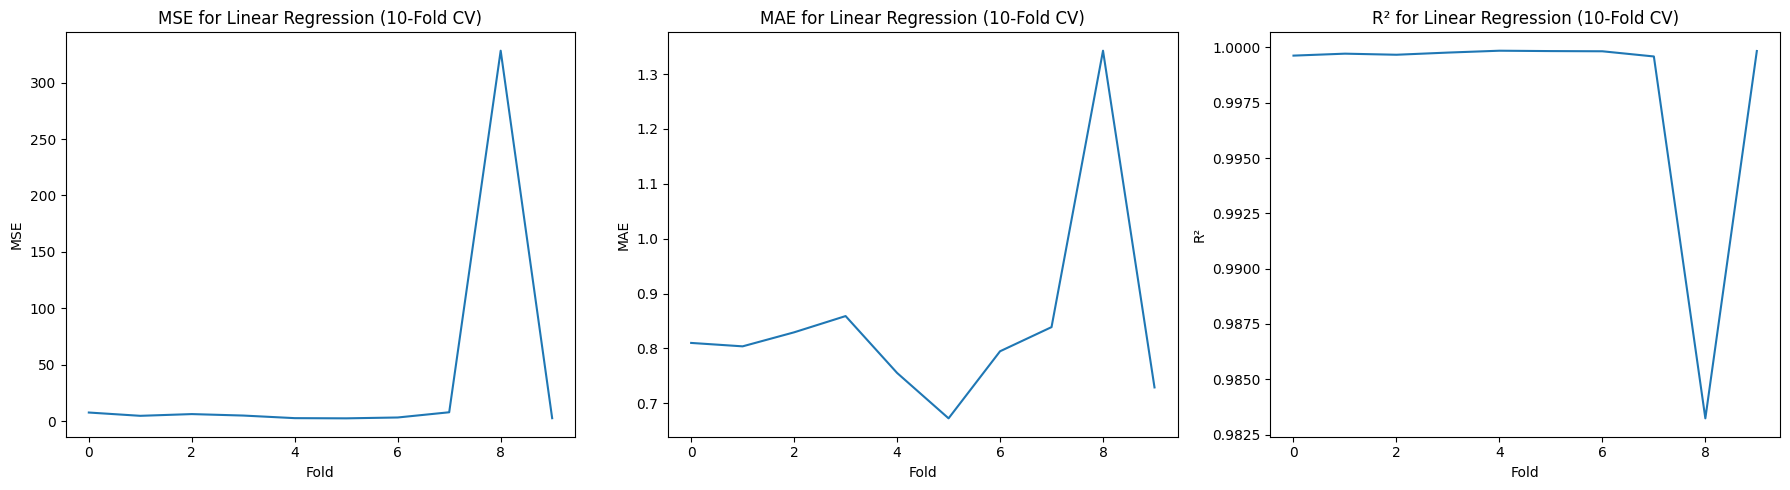

In [18]:
model_lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores_lr = []
mae_scores_lr = []
r2_scores_lr = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores_lr.append(mse)
    mae_scores_lr.append(mae)
    r2_scores_lr.append(r2)

# Average scores
average_mse_lr = np.mean(mse_scores_lr)
average_mae_lr = np.mean(mae_scores_lr)
average_r2_lr = np.mean(r2_scores_lr)

print(f"\nLinear Regression - Average MSE across folds: {average_mse_lr:.2f}")
print(f"Linear Regression - Average MAE across folds: {average_mae_lr:.2f}")
print(f"Linear Regression - Average R² across folds: {average_r2_lr:.2f}")

# Plotting the MSE, MAE, and R² scores
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(mse_scores_lr, label='MSE')
plt.title('MSE for Linear Regression (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(mae_scores_lr, label='MAE')
plt.title('MAE for Linear Regression (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(r2_scores_lr, label='R²')
plt.title('R² for Linear Regression (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

### Cross-Validation for SVM


SVM - Average MSE across folds: 37.17
SVM - Average MAE across folds: 0.84
SVM - Average R² across folds: 1.00


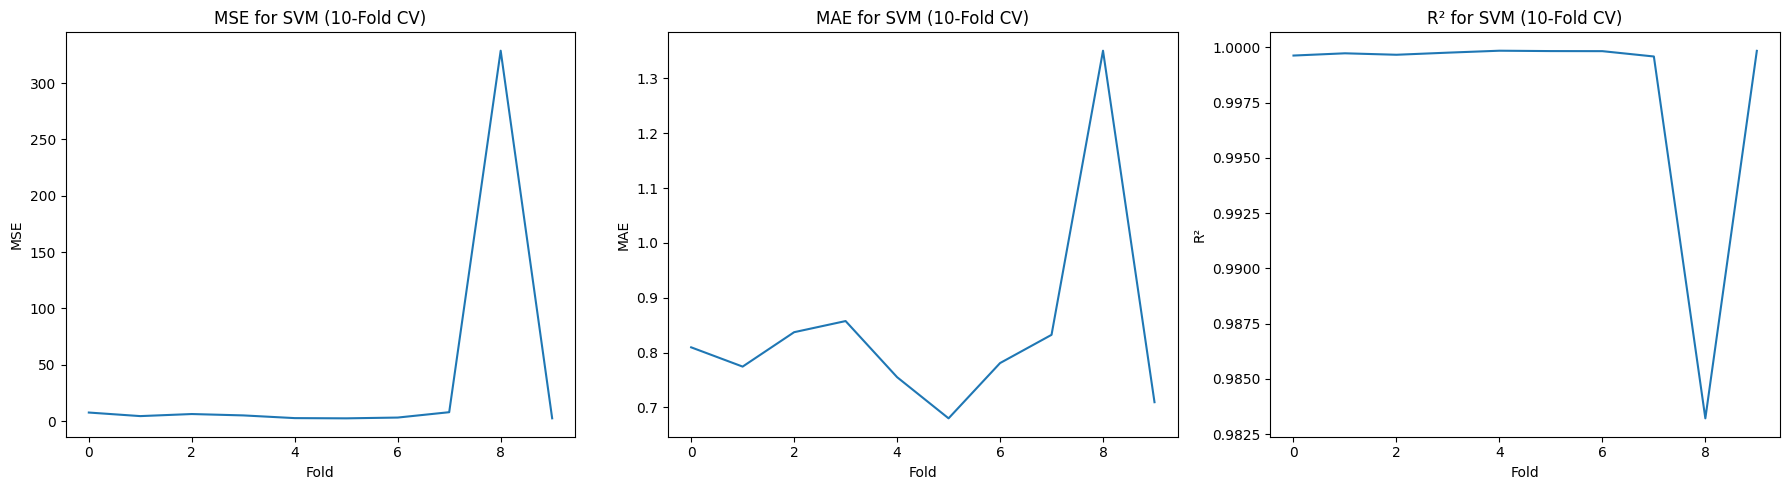

In [19]:
model_svm = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)

mse_scores_svm = []
mae_scores_svm = []
r2_scores_svm = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_svm.fit(X_train, y_train)
    y_pred = model_svm.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores_svm.append(mse)
    mae_scores_svm.append(mae)
    r2_scores_svm.append(r2)

# Average scores
average_mse_svm = np.mean(mse_scores_svm)
average_mae_svm = np.mean(mae_scores_svm)
average_r2_svm = np.mean(r2_scores_svm)

print(f"\nSVM - Average MSE across folds: {average_mse_svm:.2f}")
print(f"SVM - Average MAE across folds: {average_mae_svm:.2f}")
print(f"SVM - Average R² across folds: {average_r2_svm:.2f}")

# Plotting the MSE, MAE, and R² scores for SVM
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(mse_scores_svm, label='MSE')
plt.title('MSE for SVM (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(mae_scores_svm, label='MAE')
plt.title('MAE for SVM (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.plot(r2_scores_svm, label='R²')
plt.title('R² for SVM (10-Fold CV)')
plt.xlabel('Fold')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

### Plotting the Evaluation Metrics

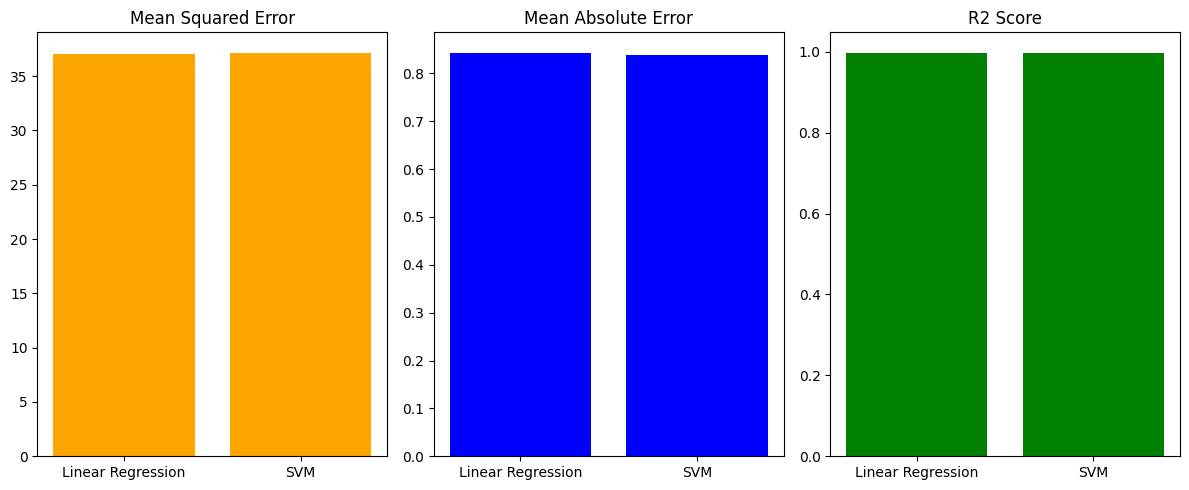

In [20]:
models = ['Linear Regression', 'SVM']
mse_scores = [average_mse_lr, average_mse_svm]
mae_scores = [average_mae_lr, average_mae_svm]
r2_scores = [average_r2_lr, average_r2_svm]

plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 3, 1)
plt.bar(models, mse_scores, color='orange')
plt.title('Mean Squared Error')

# MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores, color='blue')
plt.title('Mean Absolute Error')

# R2 Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='green')
plt.title('R2 Score')

plt.tight_layout()
plt.show()

### Train the Best Model and Plot the Predictions

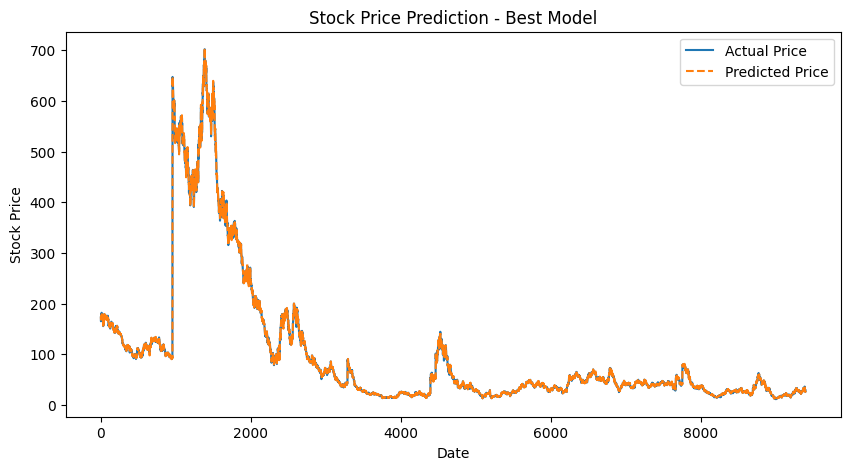

In [22]:
best_model = model_lr

best_model.fit(X_scaled, y)
y_pred_best = best_model.predict(X_scaled)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y.index, y, label='Actual Price')
plt.plot(y.index, y_pred_best, label='Predicted Price', linestyle='--')
plt.legend()
plt.title('Stock Price Prediction - Best Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()